In [1]:
from urllib.request import urlopen as ureq       #Libraries for web scraping
from bs4 import BeautifulSoup as soup

In [2]:
client=ureq("https://directory.eoportal.org/web/eoportal/satellite-missions/a")  #creating connection to url. Here the url is a satellite missions info database
print(client)

In [3]:
page=client.read()                  #reading contents of the webpage and then close the file
client.close()
print(page)

b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\t<!DOCTYPE html>\r\n\r\n\n\n\n\n\n\n\t\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\t\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\t\n\t\t\n\t\n\t\n\t\t\n\t\n\t\n\t\n\t\n\t\n\n\t\n\t\n\t\n\n\t\n\t\n\t\n\n\t\n\t\n\t\n\t\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\r\n \n\n \n\n\n\n\n \n \n\n\r\n\r\n<html class="ltr" dir="ltr" lang="en-US">\r\n\r\n<head>\r\n  \t<title>A Missions - eoPortal Directory - Satellite Missions</title>\r\n\t  <script type="text/javascript" src="https://directory.eoportal.org/cpi-basic-theme/js/jquery-1.9.0.min.js"charset="utf-8"></script>\r\n  <script type="text/javascript" src="https://directory.eoportal.org/cpi-basic-theme/js/custom-javascript.min.js"charset="utf-8"></script>\r\n  <script src="//cdnjs.cloudflare.com/ajax/libs/cookieconsent2/3.0.3/cookieconsent.min.js"></script>\r\

In [4]:
hpage=soup(page,'html.parser')     #extracting the html code of the page
print(hpage)


<!DOCTYPE html>

<html class="ltr" dir="ltr" lang="en-US">
<head>
<title>A Missions - eoPortal Directory - Satellite Missions</title>
<script charset="utf-8" src="https://directory.eoportal.org/cpi-basic-theme/js/jquery-1.9.0.min.js" type="text/javascript"></script>
<script charset="utf-8" src="https://directory.eoportal.org/cpi-basic-theme/js/custom-javascript.min.js" type="text/javascript"></script>
<script src="//cdnjs.cloudflare.com/ajax/libs/cookieconsent2/3.0.3/cookieconsent.min.js"></script>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<link href="https://directory.eoportal.org/cpi-basic-theme/images/favicon.ico" rel="Shortcut Icon"/>
<link href="/html/css/main.css?browserId=other&amp;themeId=cpibasictheme_WAR_cpibasictheme&amp;minifierType=css&amp;languageId=en_US&amp;b=6102&amp;t=1465481432000" rel="stylesheet" type="text/css"/>
<link href="https://directory.eoportal.org/html/portlet/journal_content/css/main.css?browserId=other&amp;themeId=cpibasicthem

In [5]:
containers1=hpage.find_all('td',{'class':'even'})             #After inspection, we find that information is present as a table.
containers2=hpage.find_all('td',{'class':'odd'})              #Entries are made with the <td> tag with alternating class names 'even' and 'odd'
l1=[];l2=[]                                                   #Each entry contains white space, new line characters and no break space character.
for i in range(len(containers1)):                             #First these unnecessary characters are removed
  l1.append(containers1[i].text.strip('\n').strip('\t').strip('\xa0'))      
  l2.append(containers2[i].text.strip('\n').strip('\t').strip('\xa0'))
for i in range(len(containers1)):
 print(i,l1[i],",",l2[i])

0 2017 , Aalto-1
1 Earth Observation , 
2 Planned for 2019 , AAReST
3 Non-EO , 
4 2008 , AAUSat-2
5 Non-EO , 2012
6 2013 , AAUSat3
7 Non-EO , 2014
8 Planned for 2024 , ABEX
9 Non-EO , 
10 1997 , ACE
11 Non-EO , 
12 1999 , ACRIMSAT
13 Non-EO , 2014
14 1993 , ACTS
15 Non-EO , 2004
16 1996 , ADEOS
17 Earth Observation , 1997
18 2002 , ADEOS-II
19 Earth Observation , 2003
20 Planned for 2019-2020 , Aditya-1
21 Non-EO , 
22 2013 , ADS-B
23 Non-EO , 
24 1979 , AEM-2
25 Earth Observation , 1981
26 2012 , Aeneas
27 Earth Observation , 
28 2018 , Aeolus
29 Earth Observation , 
30  , AEP
31 Non-EO , 
32 2009 , AeroCube-3
33 Earth Observation , 2009
34 2012 , AeroCube-4
35 Non-EO , 
36 2019 , AeroCube-10
37 Non-EO , 
38 2018 , AeroCube-11R3
39 Earth Observation , 
40 2015 , AeroCube-OCSD
41 Non-EO , 
42 2017 , AeroCube-OCSD -B and -C
43 Non-EO , 
44 2018 , AFSPC-11
45 Non-EO , 
46 2007 , AIM
47 Earth Observation , 
48 2014 , AISat
49 Earth Observation , 
50 2010 , AISSat-1 and 2
51 Earth Observat

In [6]:
file=open("satellite.csv","w")                                #A csv file is created to store the data in a tabular format. CSV files are easy to process in Python
heads='Mission Name,Launch date,End date,EO/Non-EO\n'         #This file can be found in the home directory of this python notebook after execution of this code
file.write(heads)
for i in range(len(containers1)):
  if(i%2==0):
    file.write(l2[i]+","+l1[i])
  else:
    file.write(","+l2[i]+","+l1[i]+"\n")
file.close()
    

In [7]:
import pandas as pd                                         #The csv file can be processed to form a dataframe.
df=pd.read_csv("satellite.csv")
print(df.head())

  Mission Name       Launch date End date          EO/Non-EO
0      Aalto-1              2017      NaN  Earth Observation
1       AAReST  Planned for 2019      NaN             Non-EO
2     AAUSat-2              2008     2012             Non-EO
3      AAUSat3              2013     2014             Non-EO
4         ABEX  Planned for 2024      NaN             Non-EO


In [8]:
df.info()                                                   #Gives information about the dataframe including null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mission Name  79 non-null     object
 1   Launch date   70 non-null     object
 2   End date      19 non-null     object
 3   EO/Non-EO     79 non-null     object
dtypes: object(4)
memory usage: 2.6+ KB


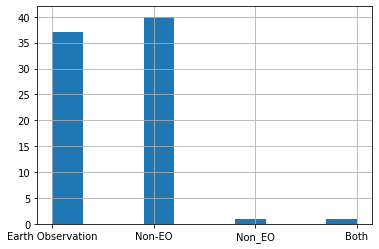

In [9]:
import matplotlib.pyplot as plt                            #Since values in the given column are objects, they must be converted to a suitable datatype(in this case, to string)
def f(x):                                                  #Then we can plot a histogram for the coulmn as only discrete values are present in it.
  return str(x)                                            #By logic we know that Non-EO and Non_EO are same. But computer doesn't understand that
df['EO/Non-EO']=df['EO/Non-EO'].apply(f)                   #lambda function did not work here. Thats why a normal function is used.
df['EO/Non-EO'].hist()
plt.show()

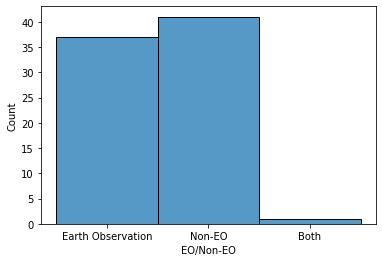

In [10]:
def f1(x):                                                     #Here the above problem was successfully resolved.
  if(x=='Non_EO'):                                             #Here we have used a library called seaborn which is used to improve the aesthetics
    return 'Non-EO'                                            #of various plots and other such structures.
  else:
    return x
df['EO/Non-EO']=df['EO/Non-EO'].apply(f1) 
import seaborn as sb                  
sb.histplot(df['EO/Non-EO'])
plt.show()

In [11]:
collist=list(df.columns)[:len(df.columns)-1]                  #That we must convert values to correct data type applies to all other columns also
for i in collist:                                             #Here we fetch all those missions whose Launch date was 2017
  df[i]=df[i].apply(f)
df[df['Launch date']=='2017']

,Mission Name,Launch date,End date,EO/Non-EO
0,Aalto-1,2017,nan,Earth Observation
21,AeroCube-OCSD -B and -C,2017,nan,Non-EO
40,AlSat-Nano,2017,nan,Earth Observation
69,ASTERIA,2017,nan,Non-EO


##Like this, we can do lot more things in Python. 
##These were one of the many things that I learnt from the Upgrad online course.